# Linear Discriminant Analysis (LDA) for Dimensionality Reduction

In this notebook, we will explore **Linear Discriminant Analysis (LDA)** as a dimensionality reduction technique. LDA is commonly used in supervised learning tasks to reduce the number of features while preserving as much class discriminatory information as possible.

## LDA vs PCA

- **PCA (Principal Component Analysis)** is an *unsupervised* method. It finds directions (principal components) that maximize variance in the data.
- **LDA (Linear Discriminant Analysis)** is a *supervised* method. It finds directions that **maximize the separation between multiple classes**.

### Key Points:
- PCA ignores class labels; LDA uses them.
- PCA maximizes variance; LDA maximizes class separability.

## Mathematical Intuition Behind LDA

LDA aims to project high-dimensional data onto a lower-dimensional space in such a way that the separation between different classes is maximized.

### Main steps:
1. Compute the **within-class scatter matrix** \( S_w \) and **between-class scatter matrix** \( S_b \)
2. Solve the eigenvalue problem:

$$
S_w^{-1} S_b \vec{w} = \lambda \vec{w}
$$

3. Select the top eigenvectors to form a new subspace.


## Load Iris Dataset and Explore

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Combine for visualization
df = pd.concat([X, y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Step 1: Standardize the Features

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 2: Apply Linear Discriminant Analysis (LDA)
We will reduce the feature set from 4 dimensions to 2 using LDA.

In [4]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Create DataFrame for visualization
lda_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
lda_df['target'] = y
lda_df.head()

,LD1,LD2,target
0,8.061800,0.300421,0
1,7.128688,-0.786660,0
2,7.489828,-0.265384,0
3,6.813201,-0.670631,0
4,8.132309,0.514463,0


## Step 3: Visualize the LDA Result

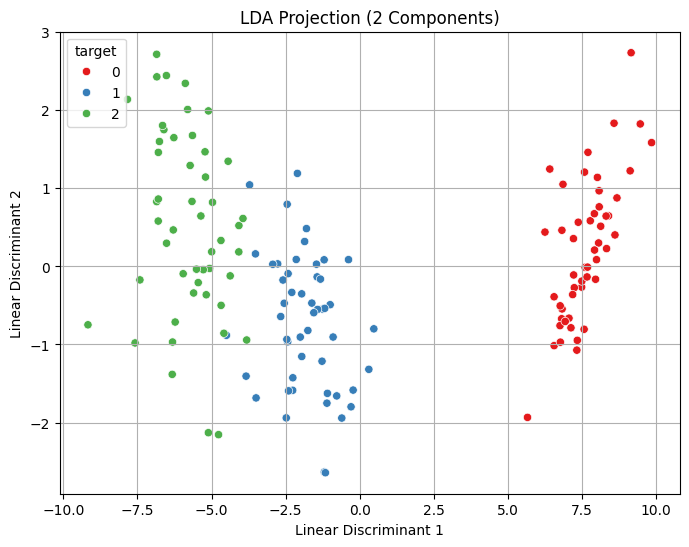

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=lda_df, x='LD1', y='LD2', hue='target', palette='Set1')
plt.title('LDA Projection (2 Components)')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.grid(True)
plt.show()

## Interpretation
- LDA has reduced the data from 4 features to 2 while preserving class separation.
- The scatter plot shows that different Iris species are **well separated** in the LD1 and LD2 space.
- LDA works well when classes are linearly separable.

### When to use LDA:
- You have labeled data (supervised).
- You want to reduce dimensionality for classification.
- Your features follow a normal distribution and classes have similar covariance.